Q. Given Sepal and Petal lengths and width predict the class of Iris

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

In [5]:
# Get dummy variables
y = pd.get_dummies(y).values

In [6]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [7]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.shape[0]

# Number of input features
input_size = 4

# Number of hidden layers neurons
hidden_size = 2 

# Number of neurons at the output layer
output_size = 3  

In [8]:
# Initialize weights
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size)) 

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [10]:
mse_list = []
accuracy_list = []

for itr in range(iterations):    
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    
    mse_list.append(mse)
    accuracy_list.append(acc)
    
    # Backpropagation
    E2 = A2 - y_train
    dW2 = np.dot(A1.T, E2 * A2 * (1 - A2)) / N

    E1 = np.dot(E2, W2.T) * A1 * (1 - A1)
    dW1 = np.dot(X_train.T, E1) / N
    
    # Weight updates
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1

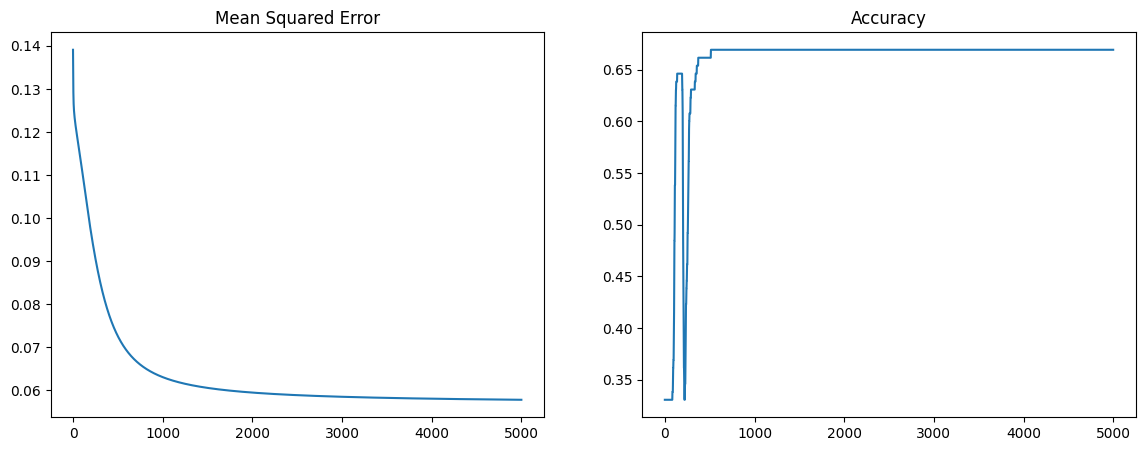

In [11]:
# Plot Mean Squared Error and Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title("Mean Squared Error")

plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title("Accuracy")

plt.show()

In [12]:
# Final accuracy on the test set
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Test Set Accuracy: {}".format(acc))

Test Set Accuracy: 0.65
